In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import random

In [2]:
import pprint

## Set normal distribution 1

In [3]:
mu1 = 0 #mean 
sigma1 = 1 #standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)

In [10]:
s1.shape

(1000,)

## Set normal diatribution 2

In [11]:
mu2 = 2 #mean
sigma2 = 1 #standard deviation
s2 = np.random.normal(mu2, sigma2, 1000)

## plot
## method 1: on the same Axis

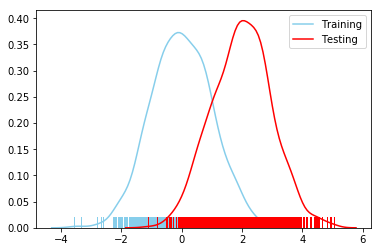

In [14]:
sns.distplot(s1, color = "skyblue", label = "Training", hist = False, rug = True)
sns.distplot(s2, color = "red", label = "Testing", hist = False, rug = True)
plt.legend();
plt.show()

## Univariate with two class in Tarining and Testing  Distributions

* Tarining: Tr

In [20]:
Tr_mu1 = 0 # mean 
Tr_sigma1 =  1 # standard deviation
Tr_s1 = np.random.normal(Tr_mu1, Tr_sigma1, 100)

Tr_mu2 = 2 # mean 
Tr_sigma2 =  1 # standard deviation
Tr_s2 = np.random.normal(Tr_mu2, Tr_sigma2, 100)

Tr_X=np.append(Tr_s1,Tr_s2)

* Testing: Ts

In [21]:
Ts_mu1 = 4 # mean 
Ts_sigma1 =  1 # standard deviation
Ts_s1 = np.random.normal(Ts_mu1, Ts_sigma1, 100)

Ts_mu2 = 6 # mean 
Ts_sigma2 =  1 # standard deviation
Ts_s2 = np.random.normal(Ts_mu2, Ts_sigma2, 100)

Ts_X=np.append(Ts_s1,Ts_s2)

## Plot

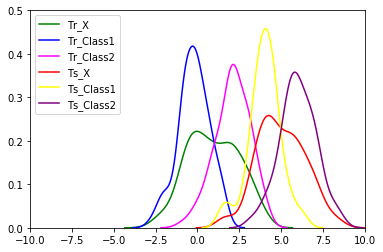

In [22]:
# Training
sns.distplot(Tr_X , color="green", label="Tr_X", hist=False)
sns.distplot(Tr_s1 , color="blue", label="Tr_Class1", hist=False)
sns.distplot(Tr_s2 , color="magenta", label="Tr_Class2",hist=False)

# Testing
sns.distplot(Ts_X , color="red", label="Ts_X", hist=False)
sns.distplot(Ts_s1 , color="yellow", label="Ts_Class1", hist=False)
sns.distplot(Ts_s2 , color="purple", label="Ts_Class2",hist=False)

plt.ylim(0,0.50)
plt.xlim(-10, 10)
plt.legend();
plt.show()

## Build ellipse function

In [23]:
def get_cov_ellipse(cov, centre, nstd, **kwargs):
    """
    Return a matplotlib Ellipse patch representing the covariance matrix
    cov centred at centre and scaled by the factor nstd.

    """
    # Find and sort eigenvalues and eigenvectors into descending order
    eigvals, eigvecs = np.linalg.eigh(cov)
    order = eigvals.argsort()[::-1]
    eigvals, eigvecs = eigvals[order], eigvecs[:, order]

    # The anti-clockwise angle to rotate our ellipse by 
    vx, vy = eigvecs[:,0][0], eigvecs[:,0][1]
    theta = np.arctan2(vy, vx)

    # Width and height of ellipse to draw
    width, height = 2 * nstd * np.sqrt(eigvals)
    return Ellipse(xy=centre, width=width, height=height,
                   angle=np.degrees(theta), **kwargs)

## New Training dataset

In [24]:
Tr_Mu1 = [2,2]
Tr_Cov1 = np.eye(2)
Tr_d1 = np.random.multivariate_normal(Tr_Mu1, Tr_Cov1, 100)

Tr_Mu2 = [8,5]
Tr_Cov2 = np.eye(2)
Tr_d2 = np.random.multivariate_normal(Tr_Mu2, Tr_Cov2, 100)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)

## New Testing data

In [30]:
Ts_Mu1 = [3,4]
Ts_Cov1 = np.eye(2)
Ts_d1 = np.random.multivariate_normal(Ts_Mu1, Ts_Cov1, 100)

Ts_Mu2 = [9,6]
Ts_Cov2 = np.eye(2)
Ts_d2 = np.random.multivariate_normal(Ts_Mu2, Ts_Cov2, 100)

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0)
Ts_X=pd.DataFrame(Ts_X_array)

## use the function regplot to make a scatterplot for Tr

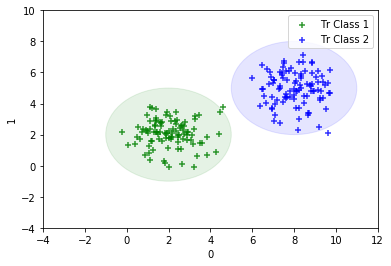

In [37]:
ax1=sns.regplot(x=Tr_X.iloc[0:100,0], y=Tr_X.iloc[0:100,1], marker="+", fit_reg=False, color="g", label="Tr Class 1")
e1 = get_cov_ellipse(Tr_Cov1, Tr_Mu1, 3,color="g", alpha=0.1)
ax1.add_artist(e1)

ax2=sns.regplot(x=Tr_X.iloc[101:200,0], y=Tr_X.iloc[101:200,1],  marker="+", fit_reg=False, color="b", label="Tr Class 2")
e2 = get_cov_ellipse(Tr_Cov2, Tr_Mu2, 3, color="b", alpha=0.1)
ax2.add_artist(e2)

plt.ylim(-4,10)
plt.xlim(-4, 12)
plt.legend();
plt.show()

## use the function regplot to make a scatterplot for Ts

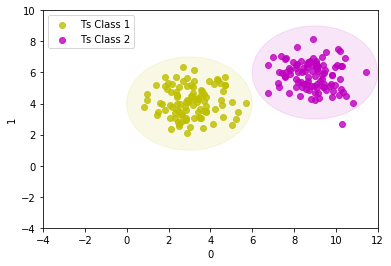

In [38]:
ax3=sns.regplot(x=Ts_X.iloc[0:100,0], y=Ts_X.iloc[0:100,1],fit_reg=False, color="y", marker="o", label="Ts Class 1")
e3 = get_cov_ellipse(Ts_Cov1, Ts_Mu1, 3, color="y", alpha=0.1)
ax3.add_artist(e3)

ax4=sns.regplot(x=Ts_X.iloc[101:200,0], y=Ts_X.iloc[101:200,1],fit_reg=False, color="m", marker="o", label="Ts Class 2")
e4 = get_cov_ellipse(Ts_Cov2, Ts_Mu2, 3,color="m", alpha=0.1)
ax4.add_artist(e4)

plt.ylim(-4,10)
plt.xlim(-4, 12)
plt.legend();
plt.show()

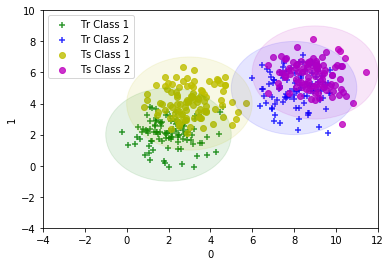

In [36]:
ax1=sns.regplot(x=Tr_X.iloc[0:100,0], y=Tr_X.iloc[0:100,1], marker="+", fit_reg=False, color="g", label="Tr Class 1")
e1 = get_cov_ellipse(Tr_Cov1, Tr_Mu1, 3,color="g", alpha=0.1)
ax1.add_artist(e1)

ax2=sns.regplot(x=Tr_X.iloc[101:200,0], y=Tr_X.iloc[101:200,1],  marker="+", fit_reg=False, color="b", label="Tr Class 2")
e2 = get_cov_ellipse(Tr_Cov2, Tr_Mu2, 3, color="b", alpha=0.1)
ax2.add_artist(e2)

ax3=sns.regplot(x=Ts_X.iloc[0:100,0], y=Ts_X.iloc[0:100,1],fit_reg=False, color="y", marker="o", label="Ts Class 1")
e3 = get_cov_ellipse(Ts_Cov1, Ts_Mu1, 3, color="y", alpha=0.1)
ax3.add_artist(e3)

ax4=sns.regplot(x=Ts_X.iloc[101:200,0], y=Ts_X.iloc[101:200,1],fit_reg=False, color="m", marker="o", label="Ts Class 2")
e4 = get_cov_ellipse(Ts_Cov2, Ts_Mu2, 3,color="m", alpha=0.1)
ax4.add_artist(e4)

plt.ylim(-4,10)
plt.xlim(-4, 12)
plt.legend();
plt.show()

## One class covariate shift

### One class covariate shift (D1): The dataset is consisting of 1000 data-points, the non-stationary shift occurs in the middle of the data stream at 501 data-point, by shifting the mean of second class from $\mathcal{N}(x: 2.5, 2)$ to $\mathcal{N}(x: 6.5, 2)$, where $\mathcal{N}(x: \mu, \sigma)$ denotes the normal distribution with mean and standard deviation respectively. 

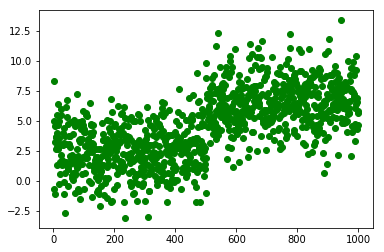

In [43]:
## Training
Tr_Mu1 = 2.5
Tr_std1= 2
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 500)

Tr_Mu2 = 6.5
Tr_std2= 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 500)

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0)
Tr_X=pd.DataFrame(Tr_X_array)
no_of_pnts=np.arange(1, 1001, dtype=np.float)


# PLOT
plt.scatter(no_of_pnts,Tr_X, color='g')
plt.show()

### Create a toy dataset set with two classes (e.g. $1$ and $2$). Choose the number of observations by yoursleves (e.g. $n=200$) and fix the number of columns to 1. The mean of class 1 and class 2 changed/shifted at the middle of the data stream (i.e. after generating $100^{th}$) observation. 

In [81]:
#================================================
## Data Before Shift
#================================================

Tr_Mu1 = 0 # mean of class 1
Tr_std1= 1 # standard deviation of class 1
Tr_d1 = np.random.normal(Tr_Mu1, Tr_std1, 100) # Generate data (covariates or input) for class 1
Tr_lbl_c1=np.ones(100) # Generate Labels for class 1

Tr_Mu2 = 6 # mean of class 2
Tr_std2= 1 # standard deviation of class 2
Tr_d2 = np.random.normal(Tr_Mu2, Tr_std2, 100) # Generate data (covariates or input) for class 2
Tr_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Tr_X_array=np.concatenate((Tr_d1,Tr_d2), axis=0) # concatenate covariates of class 1 and class 2
Tr_Y_array=np.concatenate((Tr_lbl_c1,Tr_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Tr_indx=np.random.permutation(len(Tr_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

tr_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Tr_indx[x] <= 99:
        t = 1
        tr_Y.append(t)
    else:
        t = 2
        tr_Y.append(t)      
  
Tr_X_rand=Tr_X_array[Tr_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
df_rand=pd.DataFrame({"x": Tr_X_rand, "y": tr_Y}) # put them inside a data frame

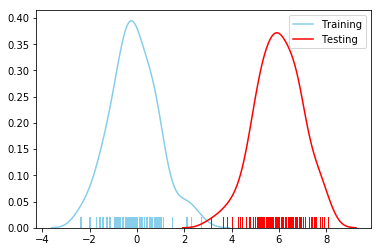

In [82]:
sns.distplot(Tr_d1 , color="skyblue", label="Training", hist=False, rug=True)
sns.distplot(Tr_d2 , color="red", label="Testing",hist=False, rug=True)
plt.legend();
plt.show()

In [83]:
Tr_indx

array([160, 193,  71, 183, 108,  43, 177,   8,  42, 142, 111, 133,  21,
       121, 167, 105, 173,  68, 174,   5, 162, 141, 102, 150, 172, 122,
       137,  69,  73, 186,   9,  51,  31,  14, 123,  40, 190, 119,  66,
        17, 101,  32, 125, 154,  41,  24, 169, 104,  59,  46,  72,  80,
       129,  85,  74,  87,  98,   2, 158, 118,  13, 170,  62,  28, 171,
         6, 113, 182, 185, 181,  61, 128, 110, 159, 175,  65,  47, 161,
        77,  76,  20,  34, 165,  19, 164,  44, 199,  90, 196,  48,  86,
       127,  84, 148,  91, 187, 155, 189, 180, 168, 138, 132,  88, 157,
       136,  49,  12,  15, 192,  78,  53,  26,   1,  30,  11, 176,  22,
        45, 130,  60, 112, 140, 144,  38,  56,  63,  37,  50, 163,  75,
        25, 184, 195,  58, 100,   4, 120, 188, 178,  16,   3,  67, 106,
        70,  10,   0, 146, 143,  18, 151, 134,  81,  54,  94, 147,  93,
        23, 107, 191,  92, 197, 126, 194, 103,  35,  89, 198,  39,  83,
        64, 115, 149,  29, 156, 152,  55,  97,  96,  27,  99, 16

In [84]:
df_rand.head()

,x,y
0,3.619399,2
1,5.934494,2
2,-0.949714,1
3,5.093814,2
4,6.383640,2


In [85]:
#================================================
## Data After Shift
#================================================

Ts_Mu1 = 0 # mean of class 1
Ts_std1= 1 # standard deviation of class 1
Ts_d1 = np.random.normal(Ts_Mu1, Ts_std1, 100) # Generate data (covariates or input) for class 1
Ts_lbl_c1=np.ones(100) # Generate Labels for class 1

Ts_Mu2 = 6 # mean of class 2
Ts_std2= 1 # standard deviation of class 2
Ts_d2 = np.random.normal(Ts_Mu2, Ts_std2, 100) # Generate data (covariates or input) for class 2
Ts_lbl_c2=np.ones(100)+1 # Generate Labels for class 2

Ts_X_array=np.concatenate((Ts_d1,Ts_d2), axis=0) # concatenate covariates of class 1 and class 2
Ts_Y_array=np.concatenate((Ts_lbl_c1,Ts_lbl_c2), axis=0) # concatenate labels of class 1 and class 2

Ts_indx=np.random.permutation(len(Ts_X_array)) # generate the indexes with permutation, so class 1 and class 2 data get mixed

ts_Y=[];
for x in range(0, 200):  # for loop to assign labels based on mixed indexes
    if Ts_indx[x] <= 99:
        t = 1
        ts_Y.append(t)
    else:
        t = 2
        ts_Y.append(t)      
  
Ts_X_rand=Ts_X_array[Ts_indx] # create an array that contains randomised data with mixture of class 1 and class 2 based on indexes
Ts_df_rand=pd.DataFrame({"x": Ts_X_rand, "y": ts_Y}) # put them inside a data frame


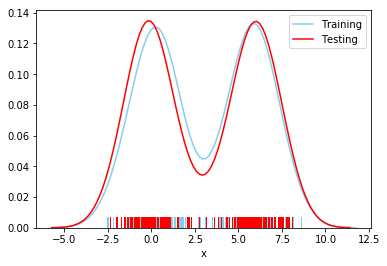

In [86]:
sns.distplot(Ts_df_rand.x , color="skyblue", label="Training", hist=False, rug=True)
sns.distplot(df_rand.x , color="red", label="Testing",hist=False, rug=True)
plt.legend();
plt.show()

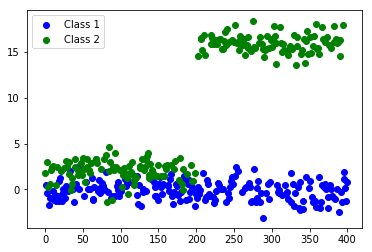

In [70]:
## Merge Two Data frame before and after shift
Data_all=[df_rand,Ts_df_rand]
df_main=pd.concat(Data_all, ignore_index=True)

df_main["indxx"]=df_main.index # create an additional column for index, which can be used for plotting a figure
df_Class1=df_main[df_main.y==1] # create a dataframe which has class 1 inputs and labels
df_Class2=df_main[df_main.y==2] # create a dataframe which has class 2 inputs and labels

# plot
plt.scatter(df_Class1.indxx, df_Class1.x, label="Class 1", color='b') # plot class 1 data
plt.scatter(df_Class2.indxx, df_Class2.x, label="Class 2", color='g') # plot class 2 data
plt.legend()
plt.show()


In [31]:
pprint.pprint(locals())

{'Ellipse': <class 'matplotlib.patches.Ellipse'>,
 'In': ['',
        'import numpy as np\n'
        'import matplotlib.pyplot as plt\n'
        'from matplotlib.patches import Ellipse\n'
        'import seaborn as sns\n'
        'import pandas as pd\n'
        'import random',
        'import pprint',
        'mu1 = 0 #mean \n'
        'sigma1 = 1 #standard deviation\n'
        's1 = np.random.normal(mu1, sigma1, 1000)',
        'pprint.pprint(local())',
        'pprint.pprint(locals())',
        's1',
        's1.shape',
        's1',
        's1',
        's1.shape',
        'mu2 = 2 #mean\n'
        'sigma2 = 1 #standard deviation\n'
        's2 = np.random.normal(mu2, sigma2, 1000)',
        'sns.distplot(s1, color = "skyblue", label = "Training", hist = False, '
        'rug = True)\n'
        'sns.distplot(s2, color = "red", label = "Testing", hist = False, rug '
        '= True)',
        'sns.distplot(s1, color = "skyblue", label = "Training", hist = False, '
        'rug = Tr

 '_6': array([-1.15373268e-02, -2.17619352e+00,  1.45201956e+00,  1.09002152e+00,
        1.75963078e+00, -1.30379772e-01,  3.42383163e-01,  1.41739874e+00,
       -1.36056293e-01, -2.34489701e-02, -7.75423680e-01,  4.98663877e-01,
       -1.00033929e-01, -9.19982057e-01, -1.41237976e+00, -1.54928262e-01,
       -5.74019047e-01, -7.43892585e-01,  1.81191223e+00,  8.99622067e-01,
       -4.36547477e-01,  9.88436765e-01, -9.90457840e-01,  4.95550018e-01,
        5.62973726e-01, -2.59845066e-01, -4.69430653e-01,  1.38190672e+00,
        6.40452899e-01,  9.98197175e-01,  8.34273956e-01, -8.24894807e-01,
        1.33144513e+00, -9.00319812e-01,  7.51888961e-02, -2.46172140e-01,
        4.23960279e-01, -6.00191043e-01, -1.47479296e+00,  8.13564988e-01,
        9.29650774e-01, -8.01707141e-01,  1.43862177e+00, -1.31557120e+00,
       -6.02951610e-02, -1.09142007e+00,  1.61963692e+00, -8.82002748e-01,
        1.89287154e-01,  2.16068143e-01, -2.27029302e-01, -3.86648343e-01,
        1.66440395

       [ 1.39709722,  2.94112807]]),
         28: (100, 2),
         29: array([[ 1.86321652,  2.06025043],
       [ 2.64987621,  0.11228599],
       [ 0.5594673 ,  2.45831331],
       [ 2.31357552,  2.84754335],
       [ 2.1649515 ,  2.1195285 ],
       [ 3.48405418,  1.44238369],
       [ 1.08536852,  1.26954462],
       [ 1.58983136,  2.82004395],
       [ 2.56601216,  2.4556801 ],
       [ 2.72001887,  2.05482884],
       [ 2.36513594,  2.21953558],
       [ 1.40488142,  3.07900449],
       [ 2.45600519,  1.54215671],
       [ 2.68847941,  2.29842841],
       [ 4.46585432,  3.48194118],
       [ 1.05313772,  0.84108283],
       [ 4.43004665,  2.06852298],
       [ 1.60483462,  2.16199574],
       [ 0.95564306,  2.24879164],
       [ 1.18671118,  1.61100892],
       [ 1.02501445,  2.09272608],
       [ 2.09622178,  2.90037764],
       [ 2.95163208,  2.16429344],
       [ 1.40807358,  2.16618347],
       [ 2.04728383, -0.10285857],
       [ 1.44104933,  2.18321531],
       [ 1.124503